In [4]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
df=pd.read_csv('C:/Machine Learning/ML_projects/ml_project/notebook/data/students.csv')


,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
X=df.drop(columns=["math score","total score","Average"],axis=1)
Y=df['math score']

In [21]:
#Create Column Transfer with 3 types of columns

num_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()

preprocessing=ColumnTransformer(
    [
        ('OneHotEncoder',ohe_transformer,categorical_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)
X=preprocessing.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
def evaluate_model(real,predicted):
    mse=mean_squared_error(real,predicted)
    mae=mean_absolute_error(real,predicted)
    r2=r2_score(real,predicted)
    rmse=root_mean_squared_error(real,predicted)

    return mse,mae,r2,rmse

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'Decison_tree':DecisionTreeRegressor(),
    'Random_Forest':RandomForestRegressor(),
    'SVR':SVR(),
    'XGBoost':XGBRegressor(),
    'CatBoost':CatBoostRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}

In [25]:
model_list=[]
r2_list=[]


for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)


    model_test_mse,model_test_mae,model_test_r2,model_test_rmse=evaluate_model(Y_test,y_test_pred)
    model_train_mse,model_train_mae,model_train_r2,model_train_rmse=evaluate_model(Y_train,y_train_pred)


    print(list(models.values())[i])
    model_list.append(list(models.keys())[i])

    
    # Print results
    print("="*50)
    
    print(f"Train -> MSE: {model_train_mse:.4f}, MAE: {model_train_mae:.4f}, RMSE: {model_train_rmse:.4f}, R²: {model_train_r2:.4f}")
    print(f"Test  -> MSE: {model_test_mse:.4f}, MAE: {model_test_mae:.4f}, RMSE: {model_test_rmse:.4f}, R²: {model_test_r2:.4f}")

    r2_list.append(model_test_r2)

LinearRegression()
Train -> MSE: 28.0395, MAE: 4.2360, RMSE: 5.2952, R²: 0.8744
Test  -> MSE: 30.1262, MAE: 4.3464, RMSE: 5.4887, R²: 0.8775
Lasso()
Train -> MSE: 42.9223, MAE: 5.1837, RMSE: 6.5515, R²: 0.8077
Test  -> MSE: 44.2775, MAE: 5.2217, RMSE: 6.6541, R²: 0.8200
Ridge()
Train -> MSE: 28.0429, MAE: 4.2341, RMSE: 5.2956, R²: 0.8744
Test  -> MSE: 30.0903, MAE: 4.3439, RMSE: 5.4855, R²: 0.8777
KNeighborsRegressor()
Train -> MSE: 36.5951, MAE: 4.7845, RMSE: 6.0494, R²: 0.8360
Test  -> MSE: 55.5176, MAE: 5.7800, RMSE: 7.4510, R²: 0.7743
DecisionTreeRegressor()
Train -> MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000, R²: 1.0000
Test  -> MSE: 57.1040, MAE: 5.9280, RMSE: 7.5567, R²: 0.7679
RandomForestRegressor()
Train -> MSE: 5.2703, MAE: 1.8263, RMSE: 2.2957, R²: 0.9764
Test  -> MSE: 37.0829, MAE: 4.7225, RMSE: 6.0896, R²: 0.8493
SVR()
Train -> MSE: 47.0101, MAE: 5.0270, RMSE: 6.8564, R²: 0.7894
Test  -> MSE: 69.1031, MAE: 5.7404, RMSE: 8.3128, R²: 0.7191
XGBRegressor(base_score=None, booster

# Results

In [27]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["mdoel","r2_score"]).sort_values(by="r2_score",ascending=False)

,mdoel,r2_score
2,Ridge,0.877694
0,LinearRegression,0.877548
8,CatBoost,0.855872
5,Random_Forest,0.849271
7,XGBoost,0.835574
9,AdaBoostRegressor,0.834054
1,Lasso,0.820027
3,KNeighborsRegressor,0.774340
4,Decison_tree,0.767892
6,SVR,0.719120


In [28]:
lin=LinearRegression(fit_intercept=True)
lin.fit(X_train,Y_train)
y_pred=lin.predict(X_test)
accuracy=r2_score(Y_test,y_pred)*100
print(accuracy)

87.7547530437513


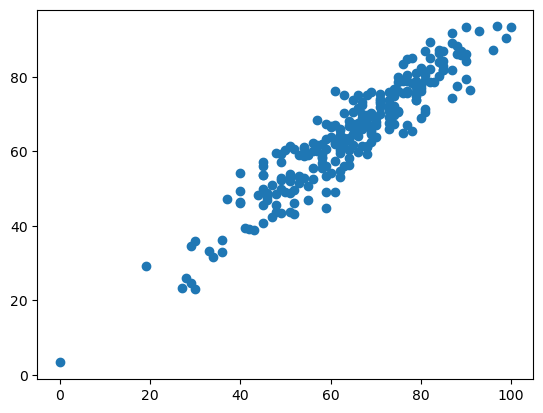

In [29]:
plt.scatter(Y_test,y_pred)

<Axes: xlabel='math score'>

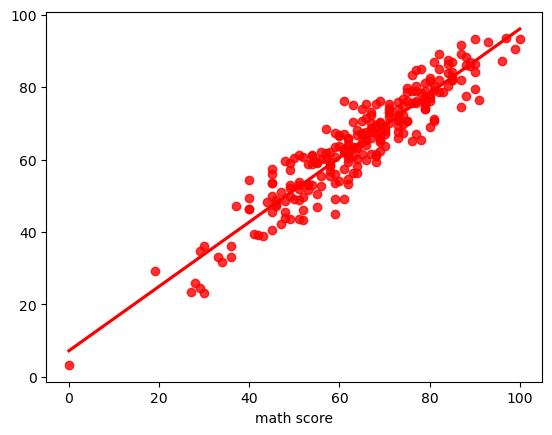

In [31]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')

In [32]:
pred_diff=pd.DataFrame({'Actual_Value':Y_test, 'Predicted_value':y_pred,'Difference':Y_test-y_pred})
pred_diff

,Actual_Value,Predicted_value,Difference
521,91,76.447770,14.552230
737,53,58.932527,-5.932527
740,80,77.041438,2.958562
660,74,76.839793,-2.839793
411,84,87.407148,-3.407148
...,...,...,...
109,70,63.811125,6.188875
430,64,63.151220,0.848780
77,80,82.504352,-2.504352
84,42,39.172544,2.827456
